In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DROP = [0.50,0.70,0.90,0.95]


LR = ['5e-03', '1e-03', '5e-04', '1e-04', '5e-05', '1e-05']

ACC = [[0.5735,0.6209,0.6364,0.5041,0.3470,0.3044],
        [0.5966,0.6299,0.6104,0.5085,0.3125,0.3632],
        [0.3007,0.5856,0.5666,0.5231,0.3369,0.3113],
        [0.3011,0.2995,0.5101,0.4359,0.3072,0.2975]]

In [ ]:
X = np.arange(6)
Y = ACC[0]
width = 0.7
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,6))
st = fig.suptitle("suptitle", fontsize="x-large")

k=0
for i in range(0,2):
    for j in range(0,2):
        print ACC[k]
        rects = ax[i][j].bar(X, ACC[k], width, color='skyblue')
        ax[i][j].set_ylim(0., 1.)
        ax[i][j].set_xticklabels(np.hstack(([0], LR)))
        k+=1

ax[0][0].axes.get_xaxis().set_visible(False)
ax[0][1].axes.get_xaxis().set_visible(False)

ax[0][1].axes.get_yaxis().set_visible(False)
ax[1][1].axes.get_yaxis().set_visible(False)

ax[0][0].set_title('Drop 0.50')
ax[0][1].set_title('Drop 0.70')
ax[1][0].set_title('Drop 0.90')
ax[1][1].set_title('Drop 0.95')

ax[1][1].set_xlabel('Learning Rate')
ax[1][0].set_xlabel('Learning Rate')
ax[0][0].set_ylabel('Accuracy')
ax[1][0].set_ylabel('Accuracy')

In [122]:
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
train_acc = "/home/trainman/Documents/jrz/TemporalNetV1/experiments/inception_v3/dog_rgb/0.7_BEST/0.001/acc_hist_drop0.7_lr0.001.p"
loss = "/home/trainman/Documents/jrz/TemporalNetV1/experiments/inception_v3/dog_rgb/0.7_BEST/0.001/loss_hist_drop0.7_lr0.001.p"
val_acc = "/home/trainman/Documents/jrz/TemporalNetV1/experiments/inception_v3/dog_rgb/0.7_BEST/0.001/val_acc_hist_drop0.7_lr0.001.p"

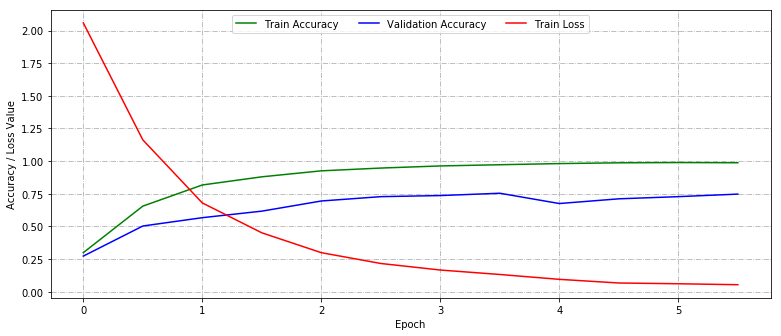

In [124]:

def plot_train(train_acc, val_acc, loss):
    
    train_acc = pickle.load(open(train_acc, 'r'))
    val_acc = pickle.load(open(val_acc, 'r'))
    loss = pickle.load(open(loss, 'r'))

    fig = plt.figure(figsize=(10,4))
    
    x = np.arange(len(train_acc))
    
    ax = fig.add_axes([0,0,1,1])
    ax.plot(x,train_acc, label='Train Accuracy', color='green')
    ax.plot(x,val_acc, label='Validation Accuracy', color='blue')
    ax.plot(x,loss, label='Train Loss', color='red')

    ax.set_xticklabels(np.hstack(([0], x)))
    
    
    ax.legend(loc='upper center', ncol=3)

    ax.grid(True)
    
    ticklines = ax.get_xticklines() + ax.get_yticklines()
    gridlines = ax.get_xgridlines() + ax.get_ygridlines()
    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

    for line in ticklines:
        line.set_linewidth(3)

    for line in gridlines:
        line.set_linestyle('-.')

    for label in ticklabels:
        label.set_color('black')
        label.set_fontsize('medium')
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy / Loss Value')
    
plot_train(train_acc, val_acc, loss)

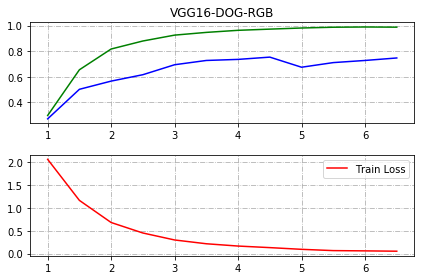

In [182]:
def plot_train_subs(train_acc, val_acc, loss):
    
    train_acc = pickle.load(open(train_acc, 'r'))
    val_acc = pickle.load(open(val_acc, 'r'))
    loss = pickle.load(open(loss, 'r'))

    fig = plt.figure(figsize=(10,4))
    x = np.arange(len(train_acc))
    
    #axes = fig.add_axes([0.1,0.1,0.8,0.8])
    fig, axes = plt.subplots(nrows=2,ncols=1)

    axes[0].plot(x, train_acc, label='Train Accuracy', color='green')
    axes[0].plot(x,val_acc, label='Validation Accuracy', color='blue')
    axes[0].set_title('VGG16-DOG-RGB')
    axes[0].set_xticklabels(np.hstack(([0], x+1)))
    axes[1].grid(True)
    
    axes[1].plot(x,loss,label='Train Loss', color='red')
    axes[1].legend(loc='upper right', ncol=1)
    axes[1].set_xticklabels(np.hstack(([0], x+1)))
    axes[0].grid(True)
    
    
    for i in axes:
        ticklines = i.get_xticklines() + i.get_yticklines()
        gridlines = i.get_xgridlines() + i.get_ygridlines()
        ticklabels = i.get_xticklabels() + i.get_yticklabels()
        if i == 1:
            axes[i].yticks(np.arange(0., max(loss)+.5, .5))
        
    
        for line in ticklines:
            line.set_linewidth(3)

        for line in gridlines:
            line.set_linestyle('-.')

        for label in ticklabels:
            label.set_color('black')
            label.set_fontsize('medium')
    
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.show()
    
plot_train_subs(train_acc, val_acc, loss)